In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [3]:
base_dir = 'images/crop/training'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.5
)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

Found 1220 images belonging to 3 classes.
Found 1220 images belonging to 3 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(3, activation='softmax')
])


In [5]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
from keras.callbacks import Callback

class BaselineEarlyStopping(EarlyStopping):
    def __init__(self, baseline, **kwargs):
        super(BaselineEarlyStopping, self).__init__(**kwargs)
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            return

        # Only stop training if the baseline is reached
        if current >= self.baseline:
            super(BaselineEarlyStopping, self).on_epoch_end(epoch, logs)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

In [7]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
39/39 [==============================] - 19s 280ms/step - loss: 1.0935 - accuracy: 0.4303 - val_loss: 1.0049 - val_accuracy: 0.5000
Epoch 2/50
39/39 [==============================] - 10s 255ms/step - loss: 0.9192 - accuracy: 0.5820 - val_loss: 0.9630 - val_accuracy: 0.5516
Epoch 3/50
39/39 [==============================] - 10s 255ms/step - loss: 0.7924 - accuracy: 0.6762 - val_loss: 0.8693 - val_accuracy: 0.5910
Epoch 4/50
39/39 [==============================] - 10s 257ms/step - loss: 0.8485 - accuracy: 0.6500 - val_loss: 0.8881 - val_accuracy: 0.6221
Epoch 5/50
39/39 [==============================] - 10s 260ms/step - loss: 0.8001 - accuracy: 0.6639 - val_loss: 0.8373 - val_accuracy: 0.6418
Epoch 6/50
39/39 [==============================] - 10s 262ms/step - loss: 0.7785 - accuracy: 0.6746 - val_loss: 0.7787 - val_accuracy: 0.6721
Epoch 7/50
39/39 [==============================] - 10s 261ms/step - loss: 0.7400 - accuracy: 0.6926 - val_loss: 0.8207 - val_accuracy: 0.6270

In [8]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

39/39 [==============================] - 5s 135ms/step - loss: 0.3368 - accuracy: 0.8844
Validation accuracy: 88.44%


['image_0.png', 'image_13.png', 'image_18.png', 'image_2.png', 'image_20.png', 'image_21.png', 'image_23.png', 'image_24.png', 'image_27.png', 'image_29.png', 'image_3.png', 'image_30.png', 'image_34.png', 'image_38.png', 'image_39.png', 'image_4.png', 'image_45.png', 'image_46.png', 'image_54.png', 'image_6.png']


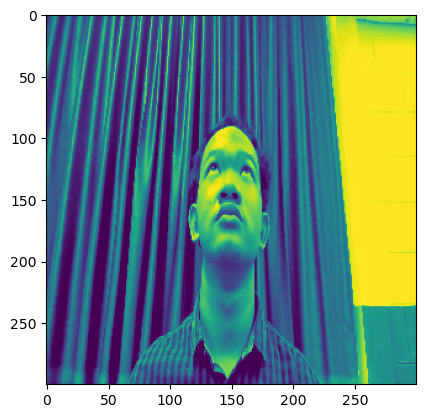

1/1 [==============================] - 0s 15ms/step
Gambar image_0.png diprediksi sebagai: alif


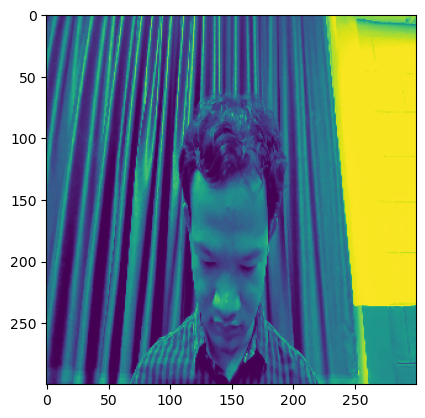

1/1 [==============================] - 0s 14ms/step
Gambar image_13.png diprediksi sebagai: diksa


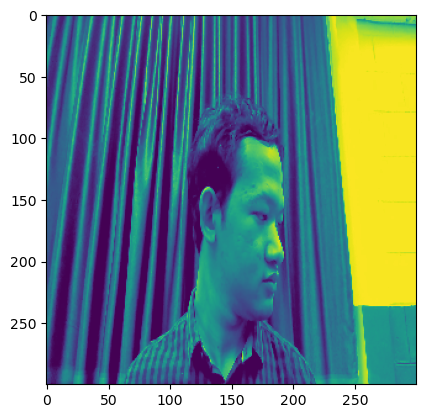

1/1 [==============================] - 0s 16ms/step
Gambar image_18.png diprediksi sebagai: diksa


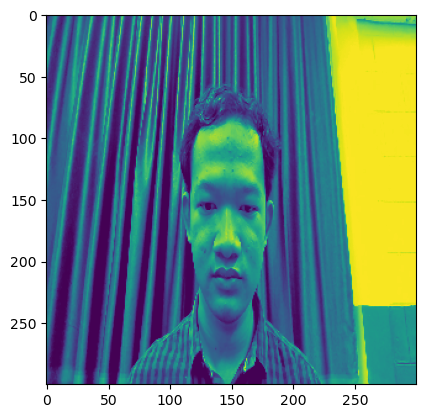

1/1 [==============================] - 0s 13ms/step
Gambar image_2.png diprediksi sebagai: alif


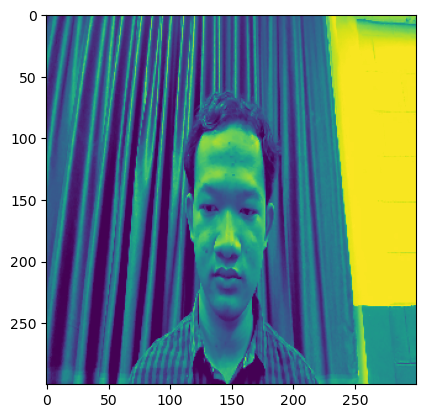

1/1 [==============================] - 0s 14ms/step
Gambar image_20.png diprediksi sebagai: alif


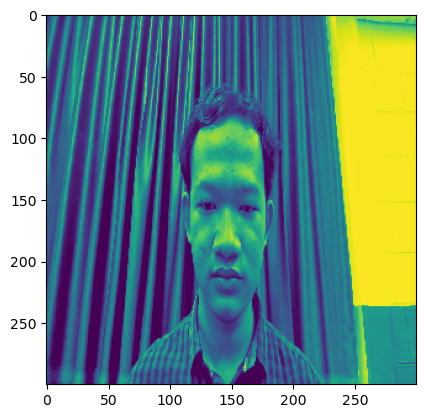

1/1 [==============================] - 0s 13ms/step
Gambar image_21.png diprediksi sebagai: alif


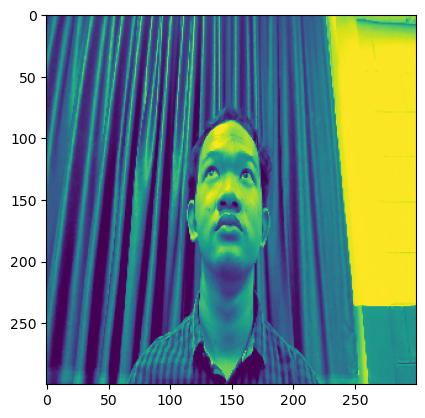

1/1 [==============================] - 0s 14ms/step
Gambar image_23.png diprediksi sebagai: alif


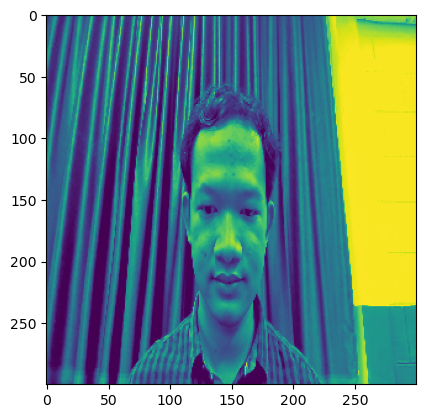

1/1 [==============================] - 0s 13ms/step
Gambar image_24.png diprediksi sebagai: alif


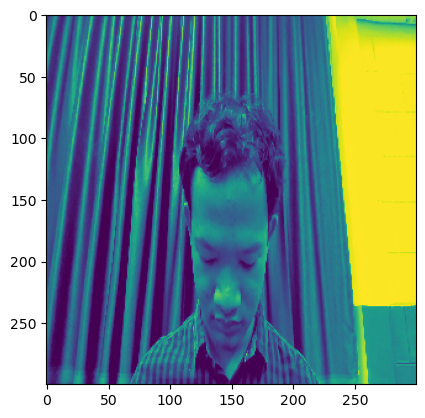

1/1 [==============================] - 0s 14ms/step
Gambar image_27.png diprediksi sebagai: diksa


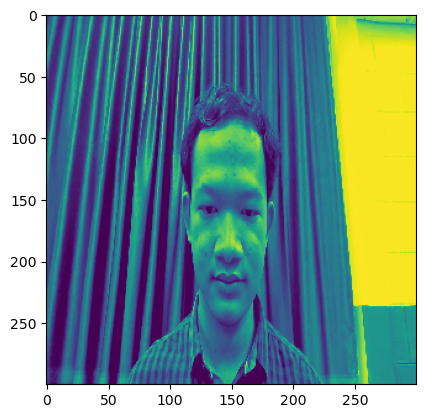

1/1 [==============================] - 0s 13ms/step
Gambar image_29.png diprediksi sebagai: alif


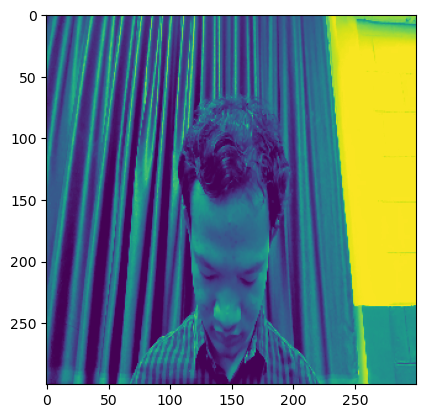

1/1 [==============================] - 0s 13ms/step
Gambar image_3.png diprediksi sebagai: diksa


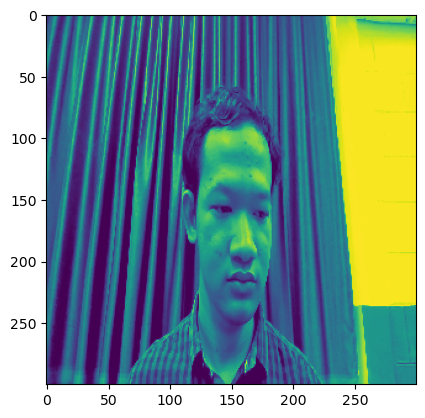

1/1 [==============================] - 0s 13ms/step
Gambar image_30.png diprediksi sebagai: diksa


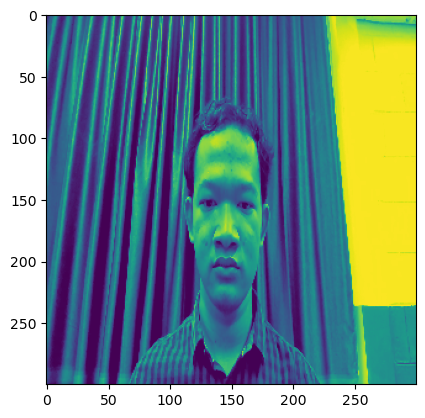

1/1 [==============================] - 0s 13ms/step
Gambar image_34.png diprediksi sebagai: alif


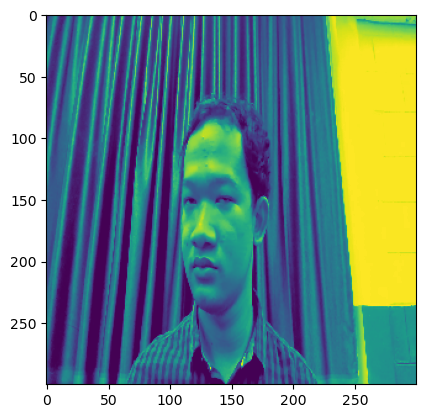

1/1 [==============================] - 0s 15ms/step
Gambar image_38.png diprediksi sebagai: alif


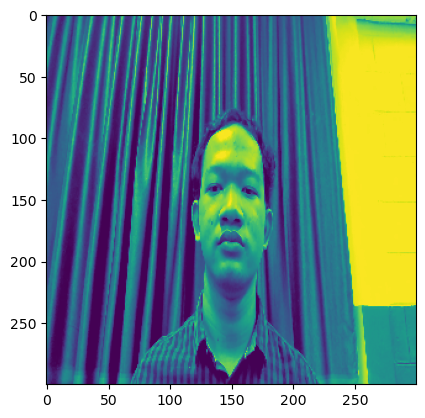

1/1 [==============================] - 0s 14ms/step
Gambar image_39.png diprediksi sebagai: alif


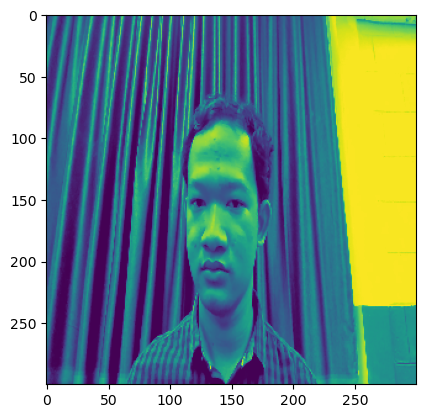

1/1 [==============================] - 0s 14ms/step
Gambar image_4.png diprediksi sebagai: alif


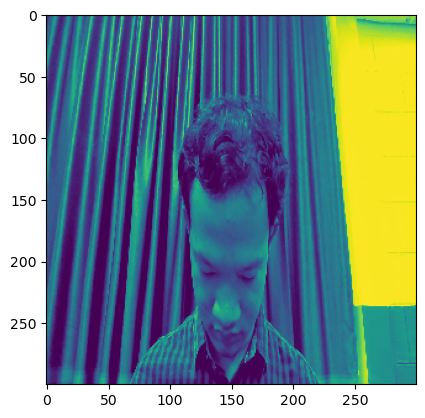

1/1 [==============================] - 0s 16ms/step
Gambar image_45.png diprediksi sebagai: diksa


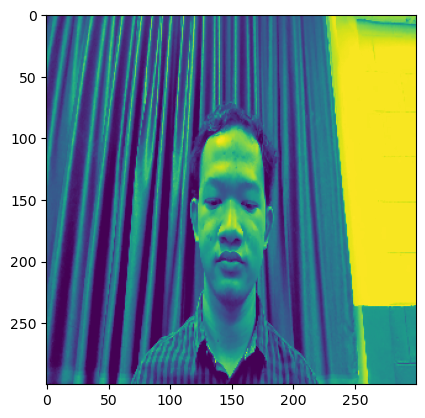

1/1 [==============================] - 0s 13ms/step
Gambar image_46.png diprediksi sebagai: alif


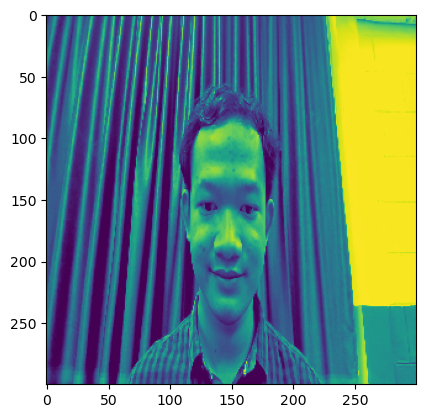

1/1 [==============================] - 0s 14ms/step
Gambar image_54.png diprediksi sebagai: alif


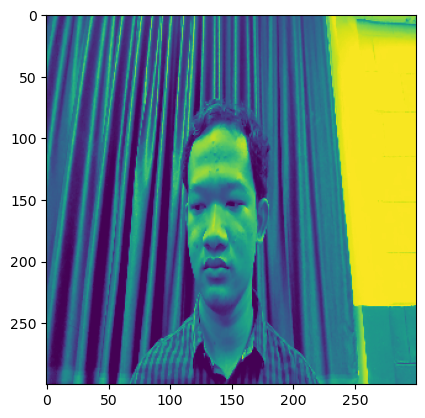

1/1 [==============================] - 0s 14ms/step
Gambar image_6.png diprediksi sebagai: alif


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(300, 300), color_mode="grayscale")
    imgplot = plt.imshow(img)
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.

    predictions = model.predict(img_array)
    classes = ['alif', 'azar', 'diksa']
    predicted_class = classes[np.argmax(predictions)]

    return predicted_class

# Path to the testing images
testing_images_path = 'images/crop/testing/alif'

# List all files in the testing images directory
image_files = [f for f in os.listdir(testing_images_path) if os.path.isfile(os.path.join(testing_images_path, f))]

print(image_files)

# Iterate over all files and predict their classes
for image_file in image_files:
    img_path = os.path.join(testing_images_path, image_file)
    predicted_class = predict_uploaded_image(model, img_path)
    print(f'Gambar {image_file} diprediksi sebagai: {predicted_class}')


In [14]:
model.save('./models/model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Path ke file model yang disimpan
model_path = 'models/your_model.h5'

# Memuat model
loaded_model = load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


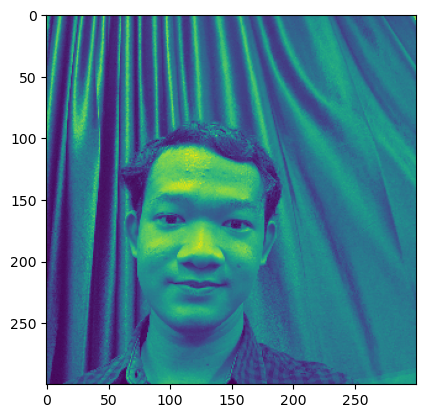

alif


In [ ]:
# Contoh menggunakan model yang dimuat untuk prediksi
# Misalnya, jika Anda memiliki gambar untuk diprediksi
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img_path = 'images/IMG_20240701_130828.jpg'

img = image.load_img(img_path, target_size=(300, 300), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

# Melakukan prediksi dengan model yang dimuat
predictions = loaded_model.predict(img_array)

imgplot = plt.imshow(img)
plt.show()
classes = ['alif', 'azar', 'diksa']
predicted_class = classes[np.argmax(predictions)]

print(predicted_class)


In [ ]:
img_path = "../images/split/testing/Colin_Powell/image_3.png"

img = image.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
imgplot = plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

predictions = model.predict(img_array)
classes = ['Colin', 'Donald', 'George', 'Gerhard', 'Tony']
predicted_class = classes[np.argmax(predictions)]


print(f'Gambar diprediksi sebagai: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: '../images/split/testing/Colin_Powell/image_3.png'